# **Titanic Survival Prediction in R (EDA)**

This is my first notebook in Kaggle using R!

I'm trying to find out how many people on titanic survived from disaster.
Here goes Titanic Survival Prediction End to End ML Pipeline.


Let's do it!

**Table of Contents**

1) Introduction
* Import Libraries
* Load data
* Run Statistical summeries

2) Visualizations
* Correlation with target variable

3) Missing values imputation, Preprocessing 
* full(train + test) data Missing columns- Embarked, Age, fare
* Categorical casting 

5) Prediction
* Split into training & test sets
* Build the model
* Feature importance
* Predictions
* Ensemble : Majority voting

6) Submission

# **Introduction**

In [1]:
# Import Libraries
library(ggplot2)
library(gridExtra)
library(tidyverse)
library(knitr)
library(corrplot)
library(caret)
library(randomForest)
library(gbm)
library(vcd)
library(varSelRF)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::combine() masks gridExtra::combine()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
corrplot 0.92 loaded

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift


The following object is masked from ‘package:httr’:

    progress


randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:gridEx

In [2]:
# Load Data
titanic_train <- read.csv("/kaggle/input/titanic/train.csv", stringsAsFactors = FALSE, header = TRUE)
titanic_test <- read.csv("/kaggle/input/titanic/test.csv",stringsAsFactors = FALSE, header = TRUE)

In [3]:
# shape
dim(titanic_train)
dim(titanic_test)

[1] 891  12

[1] 418  11

In [4]:
# Data Structure
str(titanic_test)
str(titanic_train)

'data.frame':	418 obs. of  11 variables:
 $ PassengerId: int  892 893 894 895 896 897 898 899 900 901 ...
 $ Pclass     : int  3 3 2 3 3 3 3 2 3 3 ...
 $ Name       : chr  "Kelly, Mr. James" "Wilkes, Mrs. James (Ellen Needs)" "Myles, Mr. Thomas Francis" "Wirz, Mr. Albert" ...
 $ Sex        : chr  "male" "female" "male" "male" ...
 $ Age        : num  34.5 47 62 27 22 14 30 26 18 21 ...
 $ SibSp      : int  0 1 0 0 1 0 0 1 0 2 ...
 $ Parch      : int  0 0 0 0 1 0 0 1 0 0 ...
 $ Ticket     : chr  "330911" "363272" "240276" "315154" ...
 $ Fare       : num  7.83 7 9.69 8.66 12.29 ...
 $ Cabin      : chr  "" "" "" "" ...
 $ Embarked   : chr  "Q" "S" "Q" "S" ...
'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : chr  "Braund, Mr. Owen Harris" "Cumings, Mrs. John Bradley (Florence Briggs Thayer)" "Heikkinen, Miss. Laina" "Futrelle, Mrs. Jacques Heath (

In [5]:
# Data summaries
summary(titanic_train)
summary(titanic_test)

  PassengerId       Survived          Pclass          Name          
 Min.   :  1.0   Min.   :0.0000   Min.   :1.000   Length:891        
 1st Qu.:223.5   1st Qu.:0.0000   1st Qu.:2.000   Class :character  
 Median :446.0   Median :0.0000   Median :3.000   Mode  :character  
 Mean   :446.0   Mean   :0.3838   Mean   :2.309                     
 3rd Qu.:668.5   3rd Qu.:1.0000   3rd Qu.:3.000                     
 Max.   :891.0   Max.   :1.0000   Max.   :3.000                     
                                                                    
     Sex                 Age            SibSp           Parch       
 Length:891         Min.   : 0.42   Min.   :0.000   Min.   :0.0000  
 Class :character   1st Qu.:20.12   1st Qu.:0.000   1st Qu.:0.0000  
 Mode  :character   Median :28.00   Median :0.000   Median :0.0000  
                    Mean   :29.70   Mean   :0.523   Mean   :0.3816  
                    3rd Qu.:38.00   3rd Qu.:1.000   3rd Qu.:0.0000  
                    Max.   :80.00 

  PassengerId         Pclass          Name               Sex           
 Min.   : 892.0   Min.   :1.000   Length:418         Length:418        
 1st Qu.: 996.2   1st Qu.:1.000   Class :character   Class :character  
 Median :1100.5   Median :3.000   Mode  :character   Mode  :character  
 Mean   :1100.5   Mean   :2.266                                        
 3rd Qu.:1204.8   3rd Qu.:3.000                                        
 Max.   :1309.0   Max.   :3.000                                        
                                                                       
      Age            SibSp            Parch           Ticket         
 Min.   : 0.17   Min.   :0.0000   Min.   :0.0000   Length:418        
 1st Qu.:21.00   1st Qu.:0.0000   1st Qu.:0.0000   Class :character  
 Median :27.00   Median :0.0000   Median :0.0000   Mode  :character  
 Mean   :30.27   Mean   :0.4474   Mean   :0.3923                     
 3rd Qu.:39.00   3rd Qu.:1.0000   3rd Qu.:0.0000                     
 Max

I noticed that the average 'survived' rate is 38.4%, indicating that only 38.4% of the individuals in the dataset survived.

# **Visualizations**

**I will conduct EDA before proceeding with modeling!** 

Correlation with target variable

In [6]:
# Function to plot width and height of plot
fig<-function(x,y){
    options(repr.plot.width = x, repr.plot.height = y)
    }

Warning message:
“Removed 177 rows containing non-finite values (`stat_density()`).”


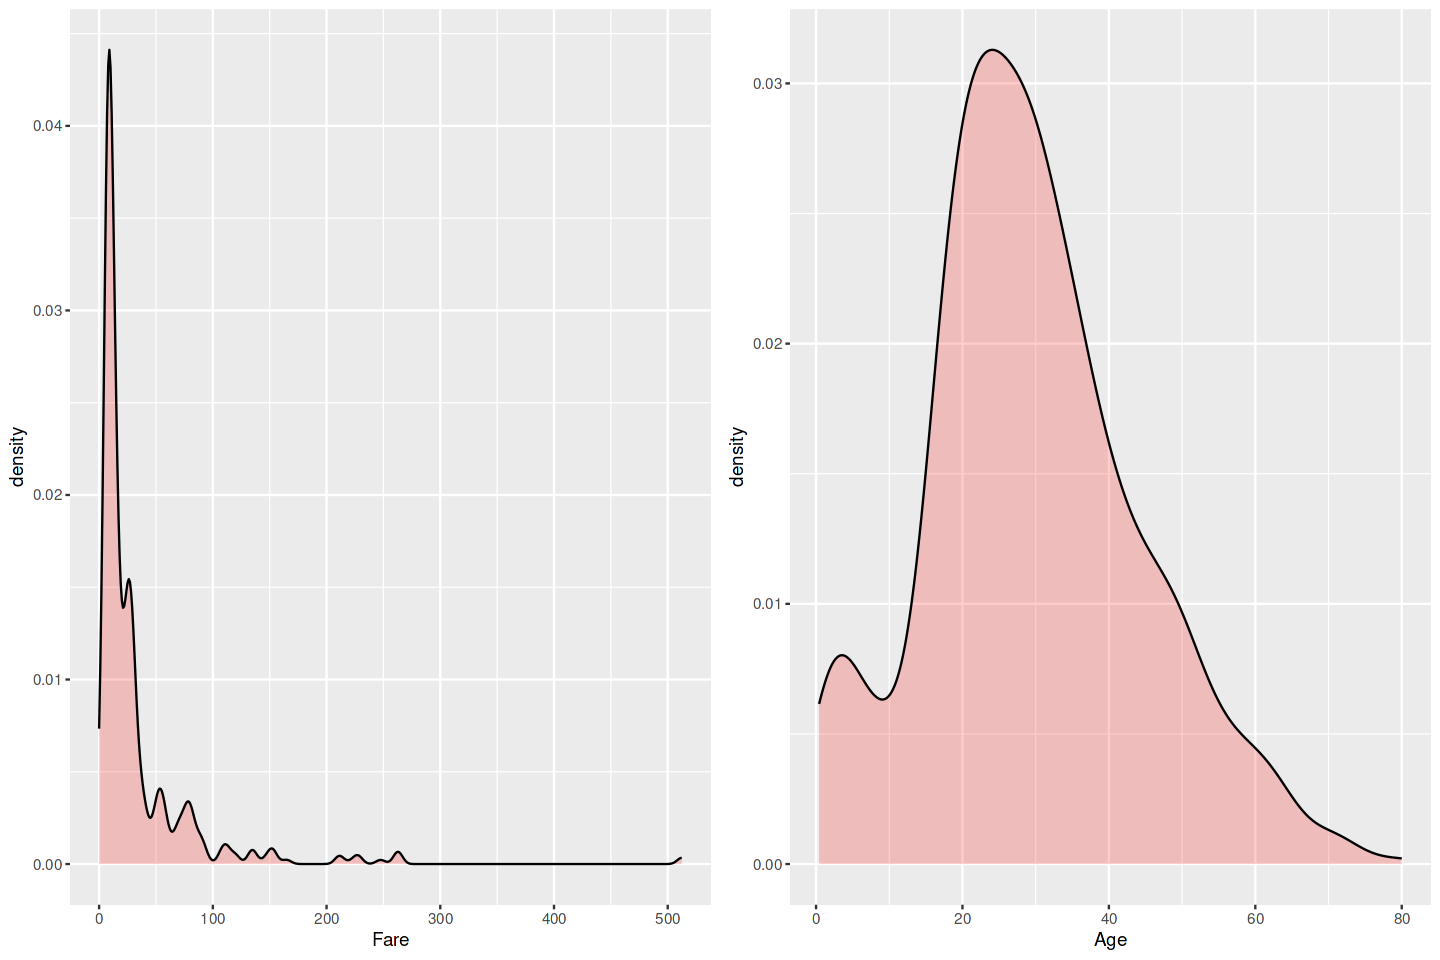

In [7]:
# Ticket price Distribution and Age Distribution 

fig(12,8)
titanic_fare <- ggplot(titanic_train, aes(x = Fare, y = after_stat(density)), main = "",
                       xlab = "Fare Distribution") + geom_density(fill = "red", alpha = 0.2)
titanic_age <- ggplot(titanic_train, aes(x=Age, y = after_stat(density)), main = "",
                      xlab = "Age Distribution") + geom_density(fill = "red", alpha=0.2)
grid.arrange(titanic_fare, titanic_age, nrow =1, ncol=2)

Fare : There is a higher distribution of passengers with fares under $50, indicating that relatively inexpensive tickets are more common.

Age : The age distribution is notably higher among those in their 20s to 40s. Additionally, there is a significant number of young passengers, likely to be the children of the higher distribution of passengers group.


**The relationship between column attributes**

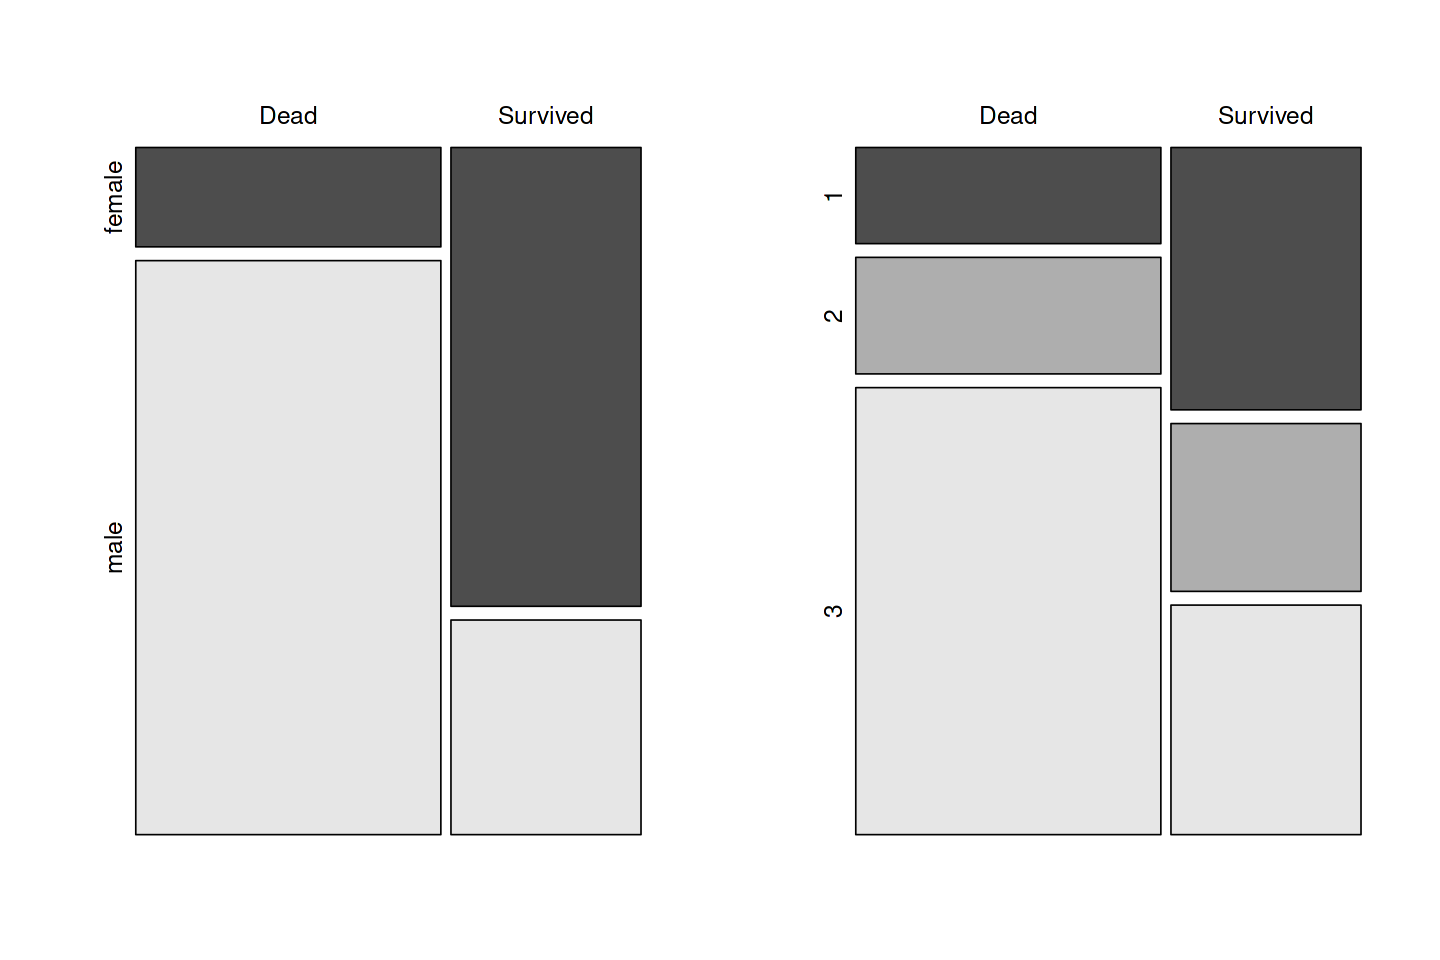

In [8]:
# mosaicplot
fig(12,8)
par(mfrow=c(1,2))
mosaicplot(table(ifelse(titanic_train$Survived==1, "Survived", "Dead"),
                 titanic_train$Sex), main = "", cex = 1.2, color=TRUE)
mosaicplot(table(ifelse(titanic_train$Survived==1, "Survived", "Dead"), 
                 titanic_train$Pclass), main = "", cex = 1.2, color=TRUE)

The survival rate is higher for women, and it's highest among passengers in class 1.

Most of the passengers who did not survive were men and were in class 3.

**Imagining the scenes from the movie, let's explore the types of passengers who were able to board the lifeboats during the Titanic's sinking, as we delve into the data below.**

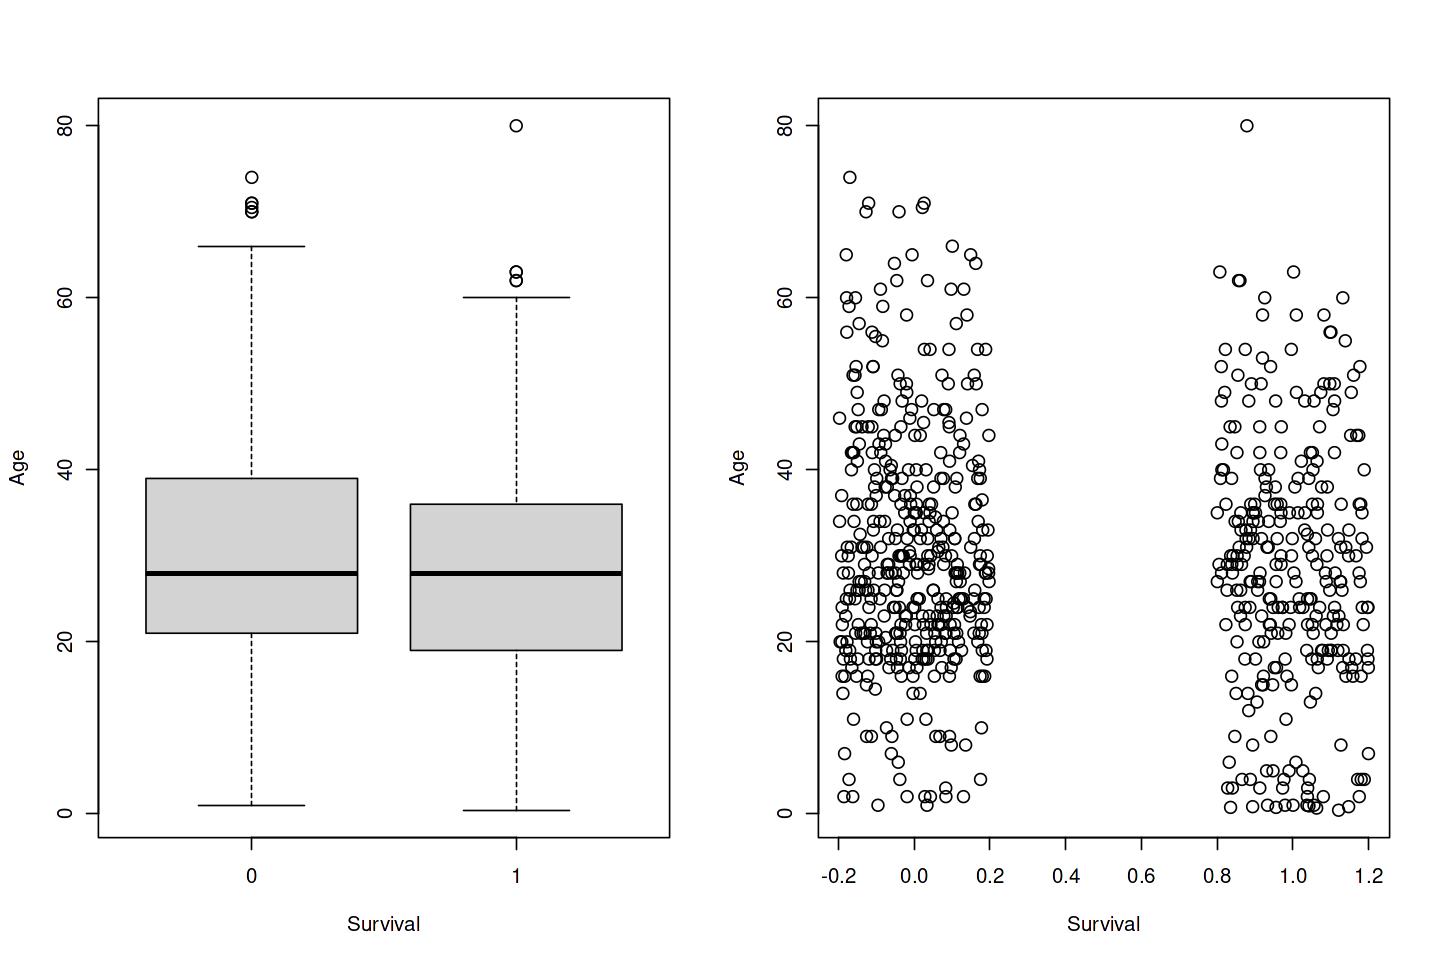

In [9]:
# Boxplot and Jitter plot

fig(12,8)
par(mfrow = c(1,2))
boxplot(Age~Survived, titanic_train, xlab = "Survival", ylab = "Age", cex = 1.2)
plot(Age~jitter(Survived), titanic_train, cex = 1.2, xlab = "Survival")

Looking at the box plot, although there are differences in the age distribution of survivors, the median ages between survivors and non-survivors don't seem to vary significantly. 

Using the jitter function to display the distribution of passengers ages with respect to their survival status reveals that, for ages between 20 and 40, there are more non-survivors than survivors. Additionally, for passengers over 60, the number of non-survivors exceeds that of survivors. 

However, in the case of young passengers aged between 0 and 10 years, there are more survivors than non-survivors.

Warning message:
“Removed 177 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 177 rows containing missing values (`geom_point()`).”


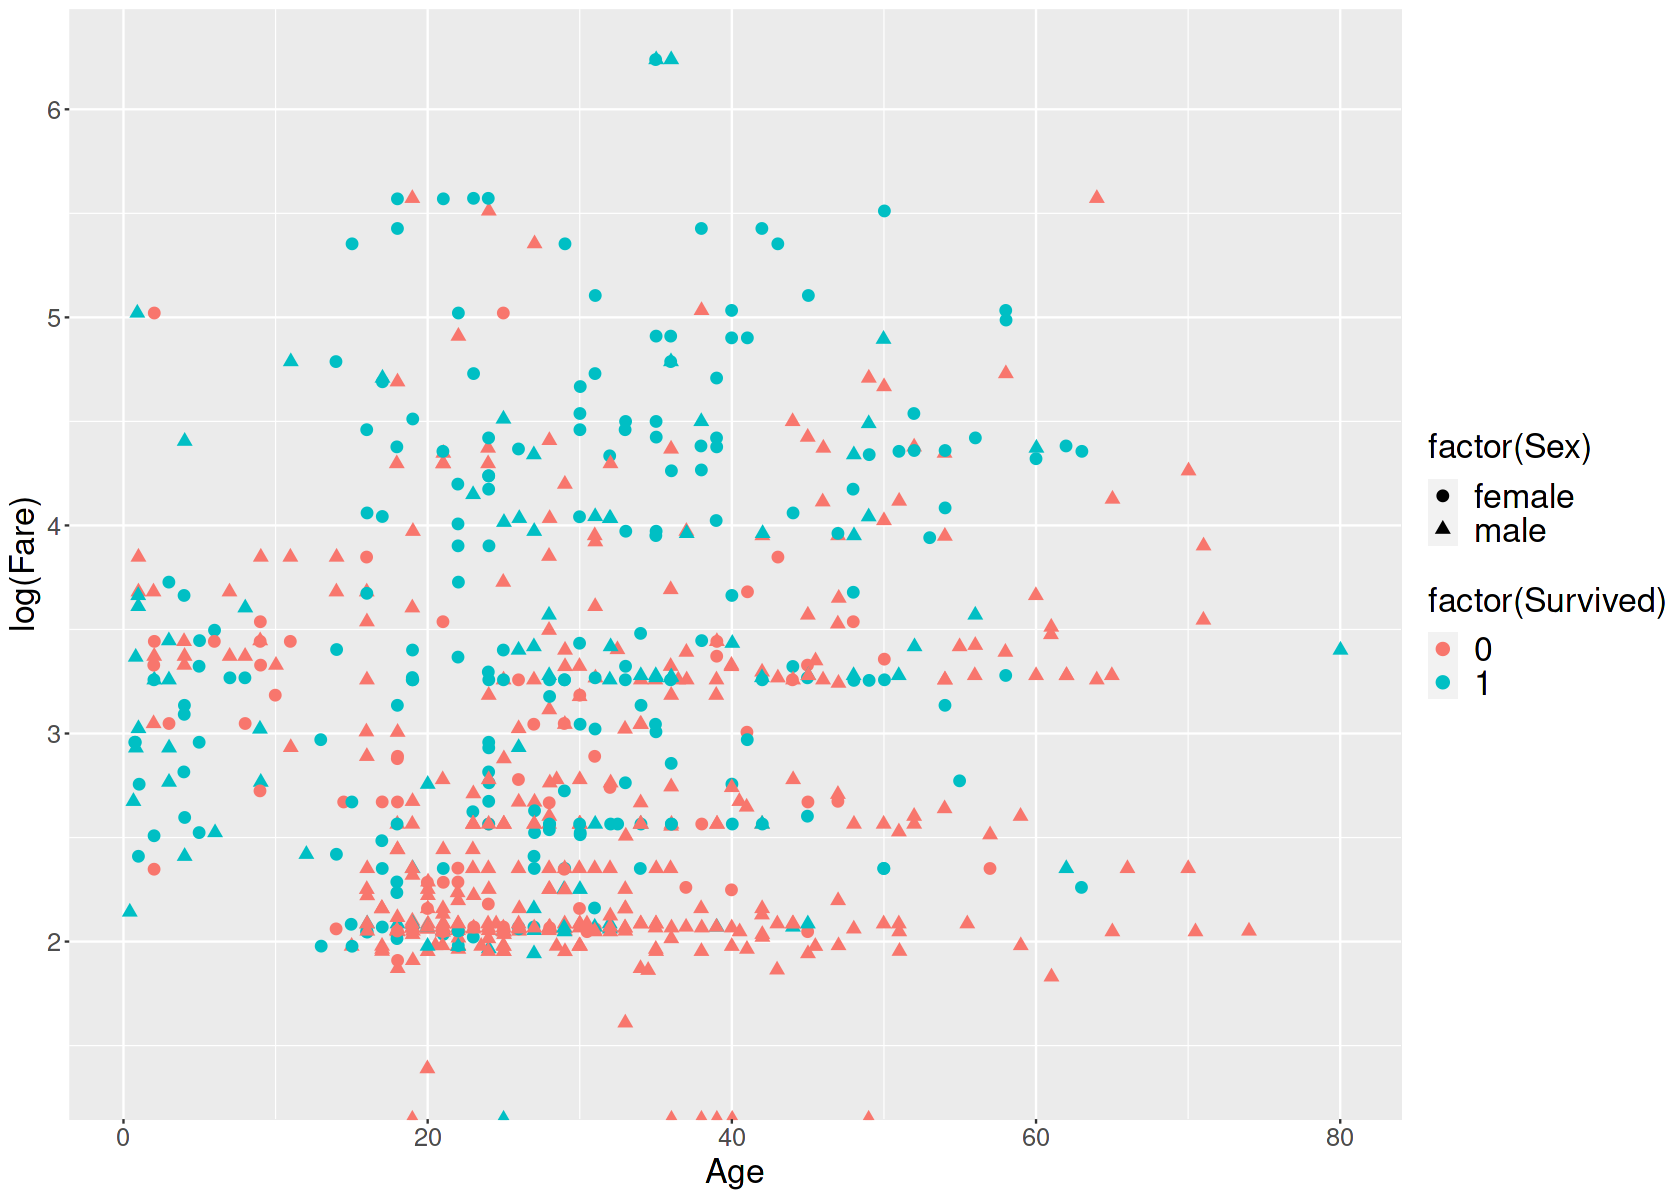

In [10]:
# Scatter plot
# Fare scale to log(Fare)
fig(14,10)
ggplot(titanic_train, aes(Age, log(Fare), color = factor(Survived),
                         shape = factor(Sex))) + geom_point() + geom_jitter(size=3) + 
theme(axis.title.x = element_text(size = 20),
     axis.title.y = element_text(size = 20),
     axis.text.x = element_text(size = 15),
     axis.text.y = element_text(size = 15),
      legend.title = element_text(size = 20),
      legend.text = element_text(size = 20))

From the graph, it's observable that most adult casualties were passengers with lower fares. Children aged 0 to 10 years have a higher survival rate. 

Additionally, as age increases, passengers with higher fares tend to have higher survival rates. Moreover, there are more female survivors (○) than male survivors (△).

**I will rely on the RandomForest classification alforithm!**

# Missing values imputation

In [11]:
# Add columns to seperate Train and Test. 
titanic_train$IsTrainSet <- TRUE
titanic_test$IsTrainSet <- FALSE

In [12]:
# Columns
names(titanic_train)
names(titanic_test)

[1] "PassengerId" "Survived"    "Pclass"      "Name"        "Sex"        
 [6] "Age"         "SibSp"       "Parch"       "Ticket"      "Fare"       
[11] "Cabin"       "Embarked"    "IsTrainSet"

[1] "PassengerId" "Pclass"      "Name"        "Sex"         "Age"        
 [6] "SibSp"       "Parch"       "Ticket"      "Fare"        "Cabin"      
[11] "Embarked"    "IsTrainSet"

In [13]:
# Add "Survived" column to merge Train + Test dataset.
titanic_test$Survived <- NA

In [14]:
# Train + Test 
titanic_full <- rbind(titanic_train, titanic_test)
table(titanic_full$IsTrainSet)


FALSE  TRUE 
  418   891 

**Clean missing values**

In [15]:
# Clean missing values of "Embarked"
table(titanic_full$Embarked)
# 2 missing data -> Assigned the value 'S' for the embarkation point where the most passengers boarded
titanic_full[titanic_full$Embarked == '', "Embarked"] <- 'S'


      C   Q   S 
  2 270 123 914 

In [16]:
# Clean missing values of "Age"
table(is.na(titanic_full$Age))
# Calculate the median value of Age and assign this median value to the missing data.
age_median <- median(titanic_full$Age, na.rm = TRUE)
titanic_full[is.na(titanic_full$Age), "Age"] <- age_median


FALSE  TRUE 
 1046   263 

In [17]:
# Clean missing value of "fare" using median value of fare.
fare_median <- median(titanic_full$Fare, na.rm = TRUE)
titanic_full[is.na(titanic_full$Fare), "Fare"] <- fare_median

**In this modeling, the missing data were assigned the median value of the entire dataset.**

In [18]:
# Categorical Casting
titanic_full$Pclass <- as.factor(titanic_full$Pclass)
titanic_full$Sex <- as.factor(titanic_full$Sex)
titanic_full$Embarked <- as.factor(titanic_full$Embarked)

In [19]:
# Split dataset back out into train and test
titanic_train <- titanic_full[titanic_full$IsTrainSet == TRUE,]
titanic_test <- titanic_full[titanic_full$IsTrainSet == FALSE,]

# Survived Categorical casting
titanic_train$Survived <- as.factor(titanic_train$Survived)

# Prediction
I will create a predictive model using the Random Forest algorithm.

In [20]:
# Modeling
survived_equation <- "Survived ~ Pclass + Sex + Age + SibSp + Parch + Fare + Embarked"
# Response variable : Survived
# Predictor variables : Pclass, Sex, Age, SibSp, Parch, Fare, Embarked

survived_formula <- as.formula(survived_equation)

In [21]:
library(randomForest)
# Using train data
# ntree is normally set to 500
# mtry is set to the square root of the number of varibels, sqrt(7) -> 3
# nodesize is set to 1% of the total number of rows 
titanic_model <- randomForest(formula = survived_formula, data = titanic_train,
                             ntree = 500, mtry = 3 , nodesize = 0.01 *nrow(titanic_test))


In [22]:
# Using test data to predict
Survived <- predict(titanic_model, newdata = titanic_test)

PassengerId <- titanic_test$PassengerId
output_df <- as.data.frame(PassengerId)
output_df$Survived <- Survived

write.csv(output_df, file = "kaggle_submission.csv", row.names = FALSE)

In [23]:
print(output_df)
table(output_df$Survived)

    PassengerId Survived
1           892        0
2           893        0
3           894        0
4           895        0
5           896        0
6           897        0
7           898        0
8           899        0
9           900        1
10          901        0
11          902        0
12          903        0
13          904        1
14          905        0
15          906        1
16          907        1
17          908        0
18          909        0
19          910        0
20          911        0
21          912        0
22          913        1
23          914        1
24          915        0
25          916        1
26          917        0
27          918        1
28          919        0
29          920        1
30          921        0
31          922        0
32          923        0
33          924        1
34          925        0
35          926        1
36          927        0
37          928        0
38          929        0
39          930        0



  0   1 
281 137 